In [36]:
import numpy as np
import sympy as sp
import pandas as pd

In [37]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [38]:
x = sp.Symbol('x')
y = sp.Symbol('y')


In [39]:
T = 0.25
A = 1
B = 1
h = 0.01


In [40]:
columns = np.arange(0, A + h, h)
index = np.arange(0, B + h, h)
values = np.zeros((len(columns), len(index)))

In [41]:
for row_pos in range(len(index)):
    for col_pos in range(len(columns)):
        values[row_pos][col_pos] = 0
        
for row_pos in range(len(index)):
    values[row_pos][len(columns)-1] = 0.85
        
for col_pos in range(1, len(index) - 1):
    values[0][col_pos] = sin(columns[col_pos])

In [42]:
for col_pos in range(1, len(index) - 1):
    values[1][col_pos] = (values[0][col_pos] + 
                          h*h/2 * (values[0][col_pos-1] - 2 *values[0][col_pos] + values[0][col_pos+1]))

In [43]:
for row_pos in range(2, len(index) - 1):
    for col_pos in range(1, len(columns) - 1):
        lamd = (values[row_pos-1][col_pos-1] - 2 * values[row_pos-1][col_pos] + values[row_pos-1][col_pos+1]) / (h*h)
        values[row_pos][col_pos] = h*h*(0.5-lamd) - 2*values[row_pos-1][col_pos]-values[row_pos-2][col_pos]
      

In [44]:
pd.DataFrame(values).applymap(lambda x: round(x, 2))[:10]

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.79,0.80,0.80,0.81,0.81,0.82,0.82,0.83,0.84,0.85
1,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.79,0.80,0.80,0.81,0.81,0.82,0.82,0.83,0.84,0.85
2,0.0,-0.03,-0.06,-0.09,-0.12,-0.15,-0.18,-0.21,-0.24,-0.27,...,-2.37,-2.39,-2.40,-2.42,-2.44,-2.46,-2.47,-2.49,-2.52,0.85
3,0.0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,3.95,3.98,4.01,4.04,4.07,4.10,4.12,4.16,0.81,0.85
4,0.0,-0.07,-0.14,-0.21,-0.28,-0.35,-0.42,-0.49,-0.56,-0.63,...,-5.53,-5.57,-5.61,-5.65,-5.69,-5.73,-5.78,-2.44,-2.49,0.85
5,0.0,0.09,0.18,0.27,0.36,0.45,0.54,0.63,0.72,0.81,...,7.10,7.16,7.21,7.27,7.32,7.38,4.05,4.12,0.78,0.85
6,0.0,-0.11,-0.22,-0.33,-0.44,-0.55,-0.66,-0.77,-0.88,-0.99,...,-8.68,-8.75,-8.81,-8.88,-8.95,-5.63,-5.71,-2.39,-2.47,0.85
7,0.0,0.13,0.26,0.39,0.52,0.65,0.78,0.91,1.04,1.17,...,10.26,10.34,10.41,10.50,7.19,7.29,3.98,4.07,0.76,0.85
8,0.0,-0.15,-0.30,-0.45,-0.60,-0.75,-0.90,-1.05,-1.20,-1.35,...,-11.83,-11.92,-12.02,-8.73,-8.83,-5.54,-5.64,-2.34,-2.45,0.85
9,0.0,0.17,0.34,0.51,0.68,0.85,1.02,1.19,1.36,1.53,...,13.41,13.52,10.24,10.35,7.07,7.19,3.90,4.02,0.74,0.85


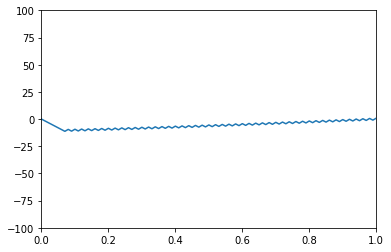

In [45]:
from IPython.html.widgets import *
%matplotlib inline
x=index


def pltsin(f):
    pylab.axis([0, 1,-100,100])
    plot(x,values[f])

interact(pltsin, f=(0,100,1));


In [ ]:
x = np.arange(10)

fig = plt.figure()
ax = plt.subplot(111)

for i in np.linspace(0, len(index) - 1, 10):
    line, = ax.plot(columns, values[int(i)], label='t={}'.format(index[int(i)]))

ax.legend(loc='best', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()